In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [5]:
# these are the independent variables
df = pd.read_csv("../input/trends-assessment-prediction/loading.csv")
features = list(df.columns[1:])

# these are the dependent variables
labels_df = pd.read_csv("../input/trends-assessment-prediction/train_scores.csv")

df = df.merge(labels_df, on="Id", how="left")
df = df.dropna()


In [6]:
# How a regression tree works: create a step function by learning the optimal boundary between steps
# by minimizing sum of square residuals against every possible boundary in the data
# then use the average value (or a linear regression?) for each step, to calculate the prediction of y
# it's typical to truncate step splitting at steps of size <=20 to prevent overfitting

# How a random forest works: a random forest is a collection of decision trees where the boundaries
# are learned from only a randomly selected subset of k of the possible regressors  at each step,
# on top of the bootstrapped data set. Then take an average of all the trees' predictions.

train_df, test_df = train_test_split(df, test_size=0.33, shuffle=True)

# Create the random forest regressor
# a bootstrapped dataset is sample that was randomly sampled with replacement from some source dataset
model = RandomForestRegressor(n_estimators=100, criterion="mse", bootstrap = True)
model.fit(train_df[features], train_df["age"])

print("Accuracy score of Random Forest Regressor on age in training set")
print(model.score(train_df[features], train_df["age"]))



Accuracy score of Random Forest Regressor on age in training set
0.9188302663022453


In [7]:
# Now we can create predictions and evaluate our model

y_predicted = model.predict(test_df[features])

print("Accuracy score of Random Forest Regressor on predicting age in test set")
print(model.score(test_df[features], test_df["age"]))

Accuracy score of Random Forest Regressor on predicting age in test set
0.43651324643763434


Text(69.0, 0.5, 'Actual (Age in decades)')

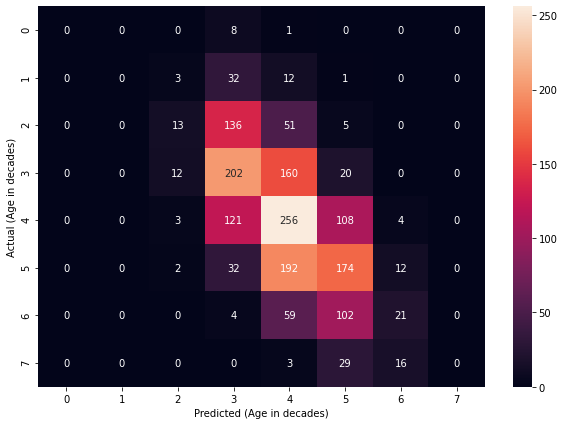

In [8]:
# It would be nice to have a visual of how well we predicted ages, so convert our prediction to a
# classification by decade of age, and plot of confusion matrix to show the accuracy of our prediction
cm = confusion_matrix(test_df["age"].round(-1).astype(int), y_predicted.round(-1).astype(int))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted (Age in decades)')
plt.ylabel('Actual (Age in decades)')